In [6]:
cd ../

/Users/williraschkowski/dev/goethe


In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import goethe.eval
import matplotlib.pyplot as plt

# Data
10 **Epochs** and **n** 10M

In [11]:
df = pd.read_csv('temp/evaluation.csv')
df.loc[df.sg == 1, ['sg']] = "Skip-gram"
df.loc[df.sg == 0, ['sg']] = "CBOW"
df = df.rename(columns={'sg': 'method'})
df = df.rename(columns={**semantic, **syntactic})

In [15]:
config = ['method', 'n', 'epochs', 'window', 'size']
semdf = df[config + list(semantic.values())]
syndf = df[config + list(syntactic.values())]

In [14]:
question_counts = pd.Series(goethe.eval.question_counts('evaluation/question-words.txt')).rename({**semantic, **syntactic})

In [10]:
semantic = {
	'Hauptstadt,Land': 'Nation, Capital',
	'Bundesland,Landeshauptstadt': 'State, Capital',
	'Land,Kontinent': 'Nation, Continent',
	'Geschlecht': 'Gender',                
	'Gotteshaus,Religion': 'Church, Religion',
	'Land,Sprache/Adjektiv': 'Nation, Language',     
	'Land,Währung': 'Nation, Currency',
	'Politiker,Partei': 'Politician, Party',
	'Singular,Plural': 'Singular, Plural',
	'Technik - Produkte': 'Technology, Producer', 
	'Werk,Erzeuger': 'Product, Producer',                      
	'Wissenschaftsbereich,Berufsbezeichnung': 'Science, Profession',
	'opposite': 'Opposite',
}

syntactic = {
	'adjectives - Positiv, Komparativ': '"gut, besser"',
	'adjectives - Positiv, Superlativ': '"gut, besten"',
	'verbs - 3.P.Sg., Partizip': '"geht, gegangen"',
	'verbs - 3.P.Sg., 1.P.Sg.':  '"geht, gehe"',
	'verbs - 3.P.Sg., 1.P.Pl.': '"geht, gehen"',
	'verbs - 3.P.Sg., Sg.Vg.': '"geht, gingen"',
	'verbs - 3.P.Sg., Pl.Vg.': '"geht, ging"',
}

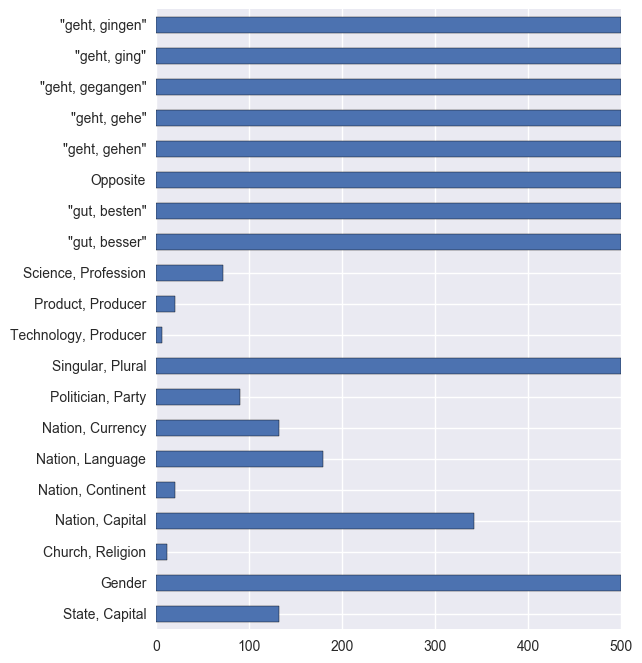

In [101]:
question_counts.plot(kind="barh", figsize=(6, 8))

In [3]:
question_examples = goethe.eval.question_examples('evaluation/question-words.txt')

# Analysis

In [19]:
def total(df):
    qcounts = question_counts[df.columns]
    def row_total(row):
        return (row.mul(qcounts).sum() / qcounts.sum())
    return df.assign(Total=df
                     .drop(config, axis=1)
                     .apply(row_total, axis=1))

In [18]:
def plot(df, column, label=None):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 5))
    ax1.set_title('CBOW')
    ax2.set_title('Skip-Gram')
    
    df = total(df)
    
    df = df.sort_values(column)

    index = df[column]
    df = df.set_index(index)
    df.index.name = None
    
    cbow = df[df.method == 'CBOW'].drop(['method', 'window', 'size', 'epochs', 'n'], axis=1)
    sg = df[df.method == 'Skip-gram'].drop(['method', 'window', 'size', 'epochs', 'n'], axis=1)
    
    sns.heatmap(cbow, annot=True, cbar=False, ax=ax1, annot_kws={'fontsize': 9})
    sns.heatmap(sg, annot=True, cbar=False, ax=ax2, annot_kws={'fontsize': 9})

In [278]:
def singleplot(df, column, sg=False):
    f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(5, 3))
    df = total(df)
    df = df.sort_values(column)

    index = df[column]
    df = df.set_index(index)
    df.index.name = None
    
    if sg:
        ax.set_title('Skip-gram')
        df = df[df.method == 'Skip-gram']
    else:
        ax.set_title('CBOW')        
        df = df[df.method == 'CBOW']
        
    df = df.drop(['method', 'window', 'size', 'epochs', 'n'], axis=1)
    sns.heatmap(df, annot=True, cbar=False, ax=ax, annot_kws={'fontsize': 9})

## Vector size

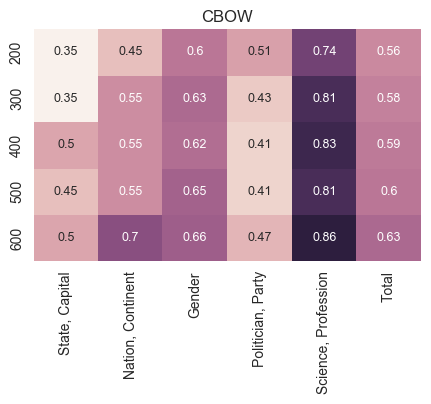

In [264]:
drop = ['Church, Religion', 'Opposite', 'Product, Producer', 'Singular, Plural', 'Nation, Currency', 'Technology, Producer', 'Nation, Language', 'Nation, Capital']
singleplot(semdf[semdf.window == 20].drop(drop, axis=1), 'size', sg=False)

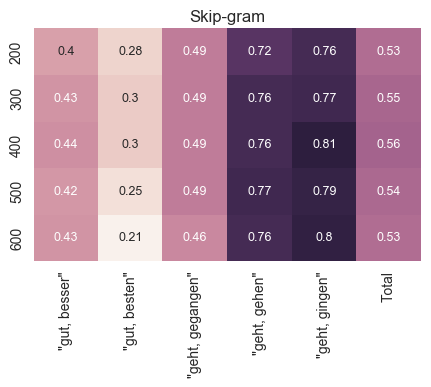

In [263]:
drop = ['"geht, ging"', '"geht, gehe"']
singleplot(syndf[syndf.window == 20].drop(drop, axis=1, errors='ignore'), 'size', sg=1)

## Window size

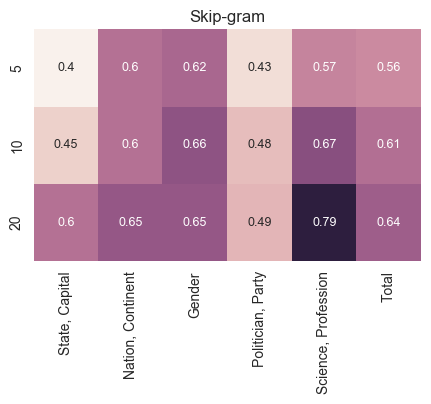

In [273]:
drop = ['Church, Religion', 'Opposite', 'Product, Producer', 'Singular, Plural', 'Nation, Currency', 'Technology, Producer', 'Nation, Language', 'Nation, Capital']
singleplot(semdf[semdf['size'] == 600].drop(drop, axis=1), 'window', sg=1)

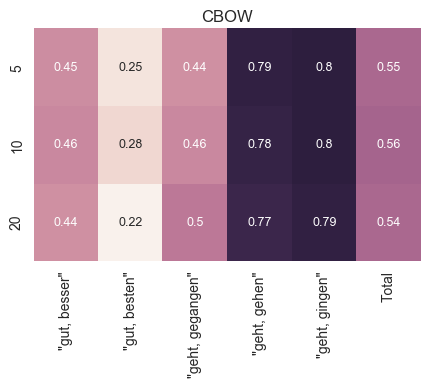

In [275]:
drop = ['"geht, ging"', '"geht, gehe"']
singleplot(syndf[syndf['size'] == 400].drop(drop, axis=1), 'window', sg=False)

## SG/CBOW

In [16]:
def totalplot(df):
    f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(5, 3))
    df = total(df)
    df['Total'] = df['Total'].round(3)
#    df = df[['method', 'window', 'size', 'Total']]
    df = df.sort_values('Total').tail(4)
    return df
    sns.heatmap(df, annot=True, cbar=False, ax=ax, annot_kws={'fontsize': 9})

,method,n,epochs,window,size,"Nation, Capital","State, Capital","Nation, Continent",Gender,"Church, Religion","Nation, Language","Nation, Currency","Politician, Party","Singular, Plural","Technology, Producer","Product, Producer","Science, Profession",Opposite,Total
25,Skip-gram,10000000,10,20,400,0.67,0.50,0.60,0.64,0.33,0.69,0.49,0.46,0.29,0.50,0.17,0.88,0.15,0.459
7,Skip-gram,10000000,10,20,500,0.67,0.55,0.60,0.63,0.50,0.69,0.49,0.48,0.29,0.83,0.33,0.86,0.15,0.463
3,Skip-gram,10000000,10,20,600,0.65,0.60,0.65,0.65,0.50,0.72,0.49,0.49,0.28,0.67,0.33,0.79,0.16,0.467
0,CBOW,10000000,10,20,600,0.67,0.50,0.70,0.66,0.33,0.72,0.47,0.47,0.29,0.67,0.33,0.86,0.15,0.467


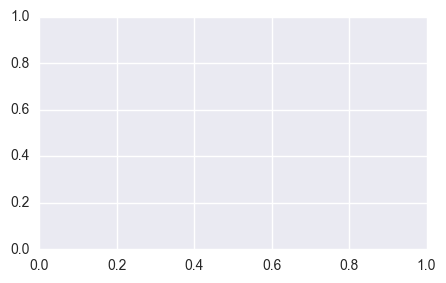

In [22]:
totalplot(semdf)